In [ ]:
#Part 1: Exploratory Data Analysis

In [74]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import random
import datetime as dt
import matplotlib.pyplot as plt
import json
from pandas import Series
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Loading the dataset
df = pd.read_json('logins.json')

In [3]:
#Getting an idea of the shape of dataset. Rows:Columns
df.shape

(93142, 1)

In [4]:
#Finding out the properties of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
#Getting a sense of the data to work with
df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [6]:
#Adding an additional feature to get a count of total logins for each time interval
df['count'] = 1

In [7]:
#Modifying the data to convert it to a dataframe with 2 features and resetting the index
df = pd.DataFrame(df.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum()).reset_index()

In [16]:
#A sampling of the newly created dataframe
df.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


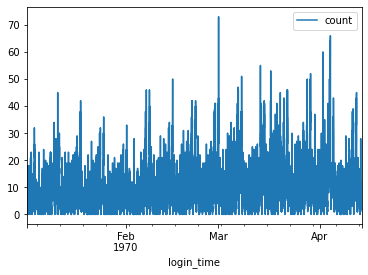

In [18]:
#Line plot of the dataframe

#As can be seen in the visualization of the data here, there are periodic and cyclic spikes in the traffic of logins. On
#average, it would appear that at the end of each 7 day cycle, the spike in traffic jumps significantly in the amount of 
#logins recorded. Also of note, the beginning of both March and April experienced the highest spikes in traffic with these
#2 months overall registering higher traffic in user logins.

df.plot(x='login_time', y='count');

In [ ]:
#Part 2: Experiment and Metrics Design

In [ ]:
# Answer 1: The key metric I would choose to encourage driver-partners to serve residents of both cities and not to be
#exclusive in their services just to one city would be the metric of customer conversion rate. By using this metric as an
#indicator for success, the driver-partners would be able to see the potential increase and percentage of total customer
#base that serving residents of both cities would bring thereby increasing their demand and earnings.

In [ ]:
# Answer 2: a) I would conduct an experiment where one portion of the business would continue with the old model
#of having driver-partners remain exclusive to the city they've been serving while I would have the other half of the fleet
#expand to offer transportation services to the other city as well. In this way, we could measure after the end of a certain
#period, say a month or so, how much of a difference in revenue there is and to measure the amount of demand for such 
#intercity transportation services.

In [ ]:
# Answer 2: b) The A/B testing would be used to check the veracity of the experiment between the two groups to
#observe any signficant differences between the old model of services versus the new model where driver-partner services
#are now expanded to operate between the two cities. 

In [ ]:
# Answer 2: c) To ensure that the experiment wouldn't be evaluated based on random results, statistical significance would
#be accounted for using the p-value. With the p-value, we can evaluate the exact probablility that the results of the 
#experiment were due to chance. We need to know the exact probability that our results were simply due to chance or if they
#hold any real significance. If we run the experiment multiple times and end up with the same variation in conversion rates 
#between the two groups, then it is only natural variance at play and thus would not be statistically significant. A/B
#testing software would do this for us however with the multiple randomized tests. If our results rarely occur, this would
#be statistically significant. 

#A recommendation I would give to city operations would be to aim for at least 95% significance level or better yet, a 99%+
#significance level which would be a p-value of 0.05% or lower as we would want results from the experiment where 0.05% or 
#lower of the continued variations of the experiment would be at least as extreme as our original experiment or even less.

#Some caveats for city operations to keep in mind is that Gotham and Metropolis operate on different circadian rhythms
#during the week so any potential profit should not be expected around this time if at all. The major use of the newly
#implemented intercity driver-partner feature should see its major use case during the weekend where both cities are
#simultaneously up and running within the same hours.

In [ ]:
#Part 3: Predictive Modeling

In [25]:
#Loading the dataset
dataframe = pd.read_json('ultimate_data_challenge.json')

In [26]:
#Getting an idea of the shape of the dataset. Rows:Columns
dataframe.shape

(50000, 12)

In [27]:
#Finding out the properties of the data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [28]:
#Getting a sense of the data to work with
dataframe.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [32]:
#Finding out date of first signup
dataframe['signup_date'].min()

'2014-01-01'

In [33]:
#Finding out the oldest last trip taken
dataframe['last_trip_date'].min()

'2014-01-01'

In [29]:
#Finding out the most recent signup date
dataframe['signup_date'].max()

'2014-01-31'

In [39]:
#Finding out the most recently recorded trip taken
dataframe['last_trip_date'].max()

'2014-07-01'

In [43]:
#Dropping columns that may be insignificant for the purposes of our predictive model
dataframe = dataframe.drop(columns=['city', 'signup_date', 'phone', ])

In [44]:
#Dropping rows with missing values as scikit does not support missing values
dataframe = dataframe.dropna()

In [46]:
#About 83% of the original users were retained after data cleaning/wrangling to remove for missing values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  41744 non-null  int64  
 1   avg_rating_of_driver    41744 non-null  float64
 2   avg_surge               41744 non-null  float64
 3   last_trip_date          41744 non-null  object 
 4   surge_pct               41744 non-null  float64
 5   ultimate_black_user     41744 non-null  bool   
 6   weekday_pct             41744 non-null  float64
 7   avg_dist                41744 non-null  float64
 8   avg_rating_by_driver    41744 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 2.9+ MB


In [57]:
#Created a variable in which to divide the observations of last_trip_date by retained versus non-retained users and created
#a new column to replace the old to render the data in a way in which the decision tree classifier will read
date_reckoner = '2014-06-01'
dataframe['last_trip'] = [1 if trip > date_reckoner else 0 for trip in dataframe['last_trip_date']]

In [61]:
#Inspecting that the 2 newly created columns (above and below), have been added to the dataframe
dataframe.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip,ultimate_black_use
0,4,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,1
1,0,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,0
2,3,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,0
3,9,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,1
4,14,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0


In [60]:
#Created a new column to replace the old to render the data in a way in which the decision tree classifier will read
dataframe['ultimate_black_use'] = [1 if user == True else 0 for user in dataframe['ultimate_black_user']]

In [62]:
#Dropped 2 former columns after converting the data in them and assigning them to new columns
dataframe = dataframe.drop(columns=['last_trip_date', 'ultimate_black_user'])

In [63]:
#Getting an idea of the properties of our modified dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  41744 non-null  int64  
 1   avg_rating_of_driver    41744 non-null  float64
 2   avg_surge               41744 non-null  float64
 3   surge_pct               41744 non-null  float64
 4   weekday_pct             41744 non-null  float64
 5   avg_dist                41744 non-null  float64
 6   avg_rating_by_driver    41744 non-null  float64
 7   last_trip               41744 non-null  int64  
 8   ultimate_black_use      41744 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 4.2 MB


In [64]:
#Approximately ~17K users were retained by Ultimate. Note: only ~83% of the original dataset was kept due to scikit-learn
#note recognizing data with missing values
dataframe['last_trip'].value_counts()

0    25016
1    16728
Name: last_trip, dtype: int64

In [65]:
#Dividing the dataset into attributes and labesl
X = dataframe.drop('last_trip', axis=1)
y= dataframe['last_trip']

In [67]:
#Implementing the final preprocessing step of dividing the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [72]:
#Created a decision tree classifier object and train the classifer with the training data.
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train);

In [73]:
#Making a prediction on the test data
y_pred = classifier.predict(X_test)

In [75]:
#Evaluating the algorithm to see how accurate it is
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3602 1340]
 [1471 1936]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4942
           1       0.59      0.57      0.58      3407

    accuracy                           0.66      8349
   macro avg       0.65      0.65      0.65      8349
weighted avg       0.66      0.66      0.66      8349



In [ ]:
#Answer to Question 2: I chose the approach of classifying the data by the decision tree classifier due to the demands of 
#the inquiry of predicting which users will continue to use Ultimate's services and identifying the users who used the
#service within the past month as active users as our label in which to use the attributes to delineate that path of user
#versus non-user. Decision Trees are the perfect predictive model in conducting a multiple attribute analysis and in
#partitioning the data into subset to illumine the path that leads to the 'decision' or label; in our case, what's likely
#to convert someone into a user or not. Alternatives considered for addressing the inquiry include Neural Networks and
#Support Vector Machines as they are both great at pattern recognition and analysing nonlinear relationships in data but
#ultimately, I felt the decision tree classifier's approach was best suited to our inquiry. A major concern here is that the
#accuracy of our decision tree classifier here at first-go is too low at only 66% and perhaps some further modifications
#are called for such as having too high an attribute count (eight) is negatively impacting the accuracy. On this note,
#perhaps multiple runs and running the classifier with a mix of only a handful of various attributes to see which one best
#influences the label would better suffice for our purposes here.

#I believe the model used here is quite valid in addressing our inquiry but since it is safe to say we have more than enough
#observations on which to train and test on to ensure adequate data for the classifier to practice with, the perhaps higher
#than usual attribute count caused the model to predict with high variance thus skewing the model toward less accuracy.

#The key indicators of model performance is displayed in the cell above this one as illustrated by the classification report
#and its readings of the model's performance with the metrics listed such as precision, recall, f1-score, etc.

In [ ]:
#Answer to Question 3: From the insight gained by the decision tree classifier used for this inquiry, Ultimate can know 
#which users are more likely (or not) to convert to long-term users and remain for more than six months based on which 
#activites and the degree to which the users engaged the products and services offered by Ultimate. Ultimate can furthermore
#request or do multiple runs with the algorithm here by modifying which attributes it implements in each trial and increase
#the accuracy of the model here by selecting only a few of the attributes to decrease the variance in predictions. Knowing
#which attributes are likely to lead to users/non-users can assist Ultimate in its marketing efforts to different segments
#of its customer base and enhance its offerings to attract long-term users or reward the current long-term customers just to
#conjure a few examples here in how Ultimate may leverage this insight.